<a href="https://colab.research.google.com/github/Antika20/Repo_Latihan_Machine_Learning/blob/main/Ras_Ayam_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/abdalnassir/chicken-breeds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/DATASET/RasAyam.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/Chicken Breeds/training'

In [ ]:
# file direktori dengan gambar daisy untuk training
train_gameFowl_dir = os.path.join('/content/Chicken Breeds/training/American Gamefowl')

# file direktori dengan gambar dandelion untuk training
train_chick_dir = os.path.join('/content/Chicken Breeds/training/Chick')


# file direktori dengan gambar dandelion untuk training
train_saphire_dir = os.path.join('/content/Chicken Breeds/training/Sapphire Gem')

# file direktori dengan gambar sunflower untuk training
train_sussex_dir = os.path.join('/content/Chicken Breeds/training/Speckled Sussex')

# file direktori dengan gambar tulip untuk training
train_wyandotte_dir = os.path.join('/content/Chicken Breeds/training/Wyandotte')


In [ ]:
print('total training gameFowl images ',len(os.listdir(train_gameFowl_dir)))

print('total training chick images ',len(os.listdir(train_chick_dir)))

print('total training saphire images ',len(os.listdir(train_saphire_dir)))

print('total training sussex images ',len(os.listdir(train_sussex_dir)))

print('total training wyandotte images ',len(os.listdir(train_wyandotte_dir)))

total training gameFowl images  168
total training chick images  164
total training saphire images  164
total training sussex images  164
total training wyandotte images  200


In [ ]:
train_gameFowl_names = os.listdir(train_gameFowl_dir) # penyimpan ke  model 

train_chick_names = os.listdir(train_chick_dir)

train_saphire_names = os.listdir(train_saphire_dir)

train_sussex_names = os.listdir(train_sussex_dir)

train_wyandotte_names = os.listdir(train_wyandotte_dir)

In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 860


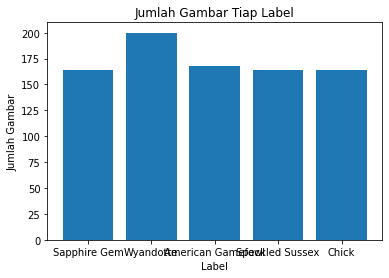

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

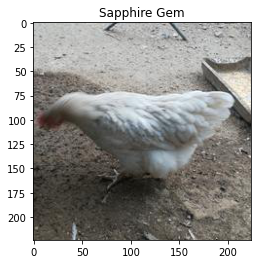

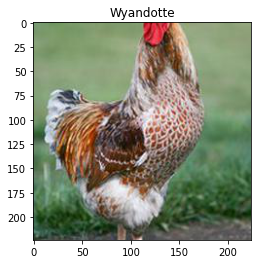

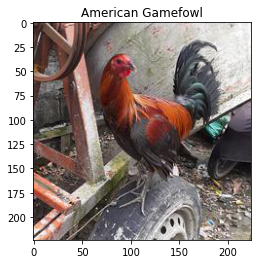

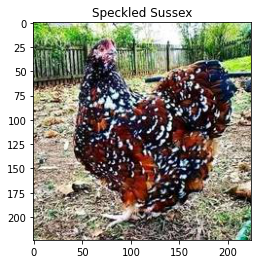

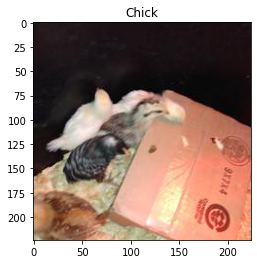

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
#untuk membuat Label -> Y
#ImageGenerator -> mudah mengklasifikasikan 2 gambar dalam 2  folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#resize nilai matriks pada gambar -> Mesinnya
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20,
                                   horizontal_flip= True, # bisa model ke kiri dan kanan  
                                   shear_range = 0.2,
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(  # akan menampilkan dari directory 
    '/content/Chicken Breeds/training',  # sumber gambar 
    target_size =(300,300),  # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128,  # setiap ngabil data akan mengambil 128 data 
    subset= 'training',
    class_mode = 'categorical')  # ini karena 2 class 

val_generator = train_datagen.flow_from_directory( # akan menampilkan dari directory 
    '/content/Chicken Breeds/validation', # sumber gambar 
    target_size =(300,300), # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128, # setiap ngabil data akan mengambil 128 data 
    subset= 'validation',
    class_mode = 'categorical') # ini karena 2 class 

# ini sebelum di augmentasi data -  > membuat data set dapat dilihat dari arah mana aja 

Found 691 images belonging to 5 classes.
Found 39 images belonging to 5 classes.


In [ ]:
# Membuat Model 
 # Cara 1 -> Membuat model kosong lalu tambahkan 
 # cara 2 -> membuat model seklaigus 
import tensorflow as tf

model = tf.keras.models.Sequential([ # singkat nya ->  model = sequential 
   #note the input shape is the deisred size of the image 300 x 300 with 3 bytes color 

   # This is the first convultion
tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape =(300,300,3)), # jumlah filter nya cnn ada 16, ukuran 3x3 , input shape = gambarnya 
tf.keras.layers.MaxPooling2D(2,2), # hasil convulusi , sixe gambar - size filter + 1 = 300 -3 +1 = 298 

   #the second convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),# akan mengambul nilai terbesar setiap 2x2  -> hasil max pooling = hasil convo / 2

  # the third convulution
tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# the Fourth convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),


# the Fitfh convulution
tf.keras.layers.Conv2D(512,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#flatten the result to feed into a CNN -> ngubah menjadi 1 dimensi 
tf.keras.layers.Flatten(),

# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),


# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),

# Hanya 5 output neuron
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(5, activation='softmax') # sigmoid outnya o dan 1 

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
# model = tf.keras.models.Sequential([
#     ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
#      tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax')  
# ])
# model.layers[0].trainable = False

# Lanjutkan dengan menentukan optimizer, loss, serta metrik yang ingin digunakan pada model.
model.compile(loss= 'categorical_crossentropy',
               optimizer ='adam',
               metrics =['accuracy'])

# melakukan pelatihan model. 
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
6/6 - 27s - loss: 1.6040 - accuracy: 0.2200 - val_loss: 1.5465 - val_accuracy: 0.2821 - 27s/epoch - 4s/step
Epoch 2/50
6/6 - 13s - loss: 1.5772 - accuracy: 0.2475 - val_loss: 1.6125 - val_accuracy: 0.2308 - 13s/epoch - 2s/step
Epoch 3/50
6/6 - 13s - loss: 1.6106 - accuracy: 0.2258 - val_loss: 1.6135 - val_accuracy: 0.1795 - 13s/epoch - 2s/step
Epoch 4/50
6/6 - 13s - loss: 1.6099 - accuracy: 0.2214 - val_loss: 1.6089 - val_accuracy: 0.1795 - 13s/epoch - 2s/step
Epoch 5/50
6/6 - 13s - loss: 1.6077 - accuracy: 0.1896 - val_loss: 1.5950 - val_accuracy: 0.1795 - 13s/epoch - 2s/step
Epoch 6/50
6/6 - 13s - loss: 1.5791 - accuracy: 0.2475 - val_loss: 1.5419 - val_accuracy: 0.2821 - 13s/epoch - 2s/step
Epoch 7/50
6/6 - 13s - loss: 1.5163 - accuracy: 0.3227 - val_loss: 1.5686 - val_accuracy: 0.3077 - 13s/epoch - 2s/step
Epoch 8/50
6/6 - 13s - loss: 1.5184 - accuracy: 0.3256 - val_loss: 1.4143 - val_accuracy: 0.4103 - 13s/epoch - 2s/step
Epoch 9/50
6/6 - 14s - loss: 1.4424 - accuracy: 

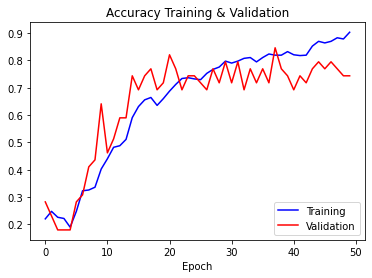

In [ ]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

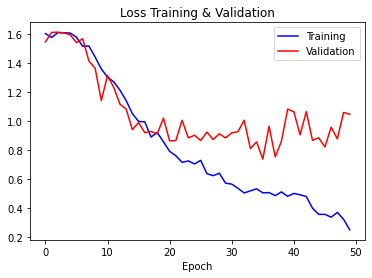

In [ ]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving 10644720_977539312271913_8728474850095623465_o.jpg to 10644720_977539312271913_8728474850095623465_o.jpg


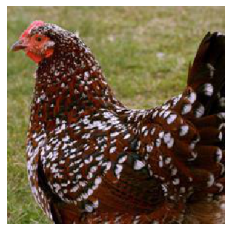

10644720_977539312271913_8728474850095623465_o.jpg
GAMBAR INI ADALAH Ayam Ras Speckled Sussex


In [ ]:
# melakukan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path =   fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes = np.argmax(classes)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  
  print(fn)
  if classes== 0:
    print('GAMBAR INI ADALAH Ayam  Ras American GameFowl ')
  elif classes==1:
    print('GAMBAR INI ADALAH Ayam Ras Chick')
  elif classes==2:
    print(' GAMBAR INI ADALAH Ayam Ras Sahpphire Gem')
  elif classes==3:
    print('GAMBAR INI ADALAH Ayam Ras Speckled Sussex')
  else:
    print(' GAMBAR INI ADALAH Ayam Ras Wyandotte')